In [1]:
from fastai.vision.all import *

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
db = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    splitter=GrandparentSplitter(train_name='train', valid_name='valid'),
    get_y=parent_label,
    item_tfms=Resize(224))

In [3]:
def diagnosis(x): return x[0].isupper()

In [4]:
path = '/kaggle/input/new-plant-diseases-dataset/new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)'
dls = db.dataloaders(path, label_func=diagnosis)

In [5]:
learn = vision_learner(dls, 'vit_small_patch16_224', metrics=error_rate, opt_func=Adam)

model.safetensors:   0%|          | 0.00/88.2M [00:00<?, ?B/s]

In [6]:
learn.fine_tune(epochs=5)

epoch,train_loss,valid_loss,error_rate,time
0,0.134497,0.046805,0.016447,10:11


epoch,train_loss,valid_loss,error_rate,time
0,0.040298,0.018564,0.006146,12:23
1,0.020076,0.011566,0.003642,12:21
2,0.008303,0.006811,0.001935,12:23
3,0.003148,0.005925,0.001480,12:21
4,0.000872,0.004660,0.001024,12:21


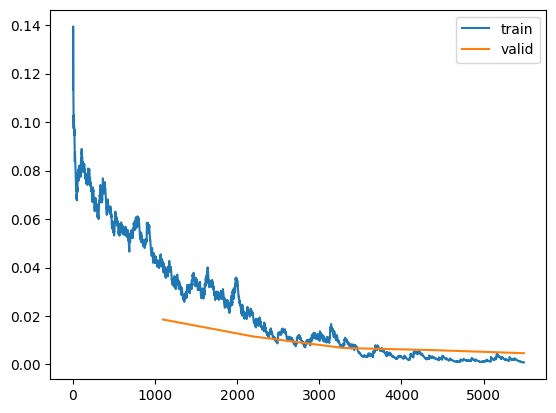

In [7]:
learn.recorder.plot_loss()

In [8]:
print(dls.vocab)

['Apple___Apple_scab', 'Apple___Black_rot', 'Apple___Cedar_apple_rust', 'Apple___healthy', 'Blueberry___healthy', 'Cherry_(including_sour)___Powdery_mildew', 'Cherry_(including_sour)___healthy', 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 'Corn_(maize)___Common_rust_', 'Corn_(maize)___Northern_Leaf_Blight', 'Corn_(maize)___healthy', 'Grape___Black_rot', 'Grape___Esca_(Black_Measles)', 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 'Grape___healthy', 'Orange___Haunglongbing_(Citrus_greening)', 'Peach___Bacterial_spot', 'Peach___healthy', 'Pepper,_bell___Bacterial_spot', 'Pepper,_bell___healthy', 'Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy', 'Raspberry___healthy', 'Soybean___healthy', 'Squash___Powdery_mildew', 'Strawberry___Leaf_scorch', 'Strawberry___healthy', 'Tomato___Bacterial_spot', 'Tomato___Early_blight', 'Tomato___Late_blight', 'Tomato___Leaf_Mold', 'Tomato___Septoria_leaf_spot', 'Tomato___Spider_mites Two-spotted_spider_mite', 'Tomato___Target_Sp

In [9]:
learn.export('model.pkl')